In [5]:
import os
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [9]:
import ipywidgets as widgets
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [10]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    path = os.path.join('D:/Minor Project/brain tumor/Training',i)
    for j in os.listdir(path):
        img = cv2.imread(os.path.join(path,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    path = os.path.join('D:/Minor Project/brain tumor/Testing',i)
    for j in os.listdir(path):
        img = cv2.imread(os.path.join(path,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train.shape

(3264, 150, 150, 3)

In [11]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [12]:
X_train, X_test, Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101) 
X_train.shape

(2937, 150, 150, 3)

In [13]:
y_train_new =[]
for i in Y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new =[]
for i in Y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


#### CNN

In [51]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_14 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [59]:
model.compile(loss ='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [60]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 118s 1s/step - loss: 1.9175 - accuracy: 0.2928 - val_loss: 1.3605 - val_accuracy: 0.2823
Epoch 2/20
83/83 [==============================] - 113s 1s/step - loss: 1.1864 - accuracy: 0.4631 - val_loss: 1.0236 - val_accuracy: 0.5680
Epoch 3/20
83/83 [==============================] - 113s 1s/step - loss: 0.9669 - accuracy: 0.5672 - val_loss: 0.9974 - val_accuracy: 0.5918
Epoch 4/20
83/83 [==============================] - 113s 1s/step - loss: 0.8726 - accuracy: 0.6254 - val_loss: 0.7522 - val_accuracy: 0.6361
Epoch 5/20
83/83 [==============================] - 113s 1s/step - loss: 0.7523 - accuracy: 0.6773 - val_loss: 0.8159 - val_accuracy: 0.5986
Epoch 6/20
83/83 [==============================] - 112s 1s/step - loss: 0.6773 - accuracy: 0.7037 - val_loss: 0.8340 - val_accuracy: 0.6122
Epoch 7/20
83/83 [==============================] - 111s 1s/step - loss: 0.6175 - accuracy: 0.7348 - val_loss: 0.6592 - val_accuracy: 0.7415
Epoch 8/20
83

In [61]:
import pickle
file_name = 'brain_tumor_model.sav'
pickle.dump(model,open(file_name,'wb'))

In [62]:
model.save('braintumor.h5')

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


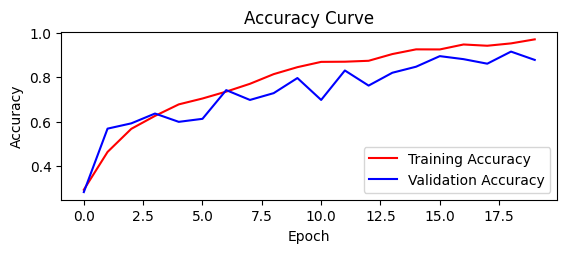

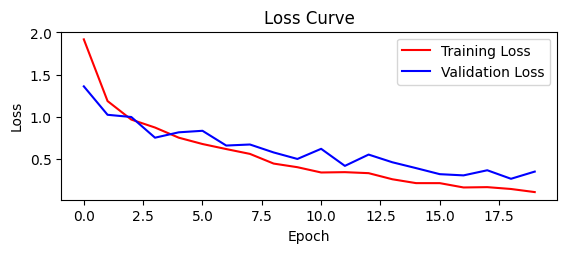

In [67]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))
plt.subplot(2, 1, 1)
#plt.figure(figsize=(10, 4))
plt.plot(epoch, acc,'r', label='Training Accuracy')
plt.plot(epoch, val_acc,'b', label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epoch, loss, 'r', label='Training Loss')
plt.plot(epoch, val_loss, 'b', label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Prediction

In [74]:
img = cv2.imread('D:/Minor Project/brain tumor/Training/pituitary_tumor/p (3).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
print(img_array.shape)
img_array = img_array.reshape(1,150,150,3)
print(img_array.shape)


(150, 150, 3)
(1, 150, 150, 3)


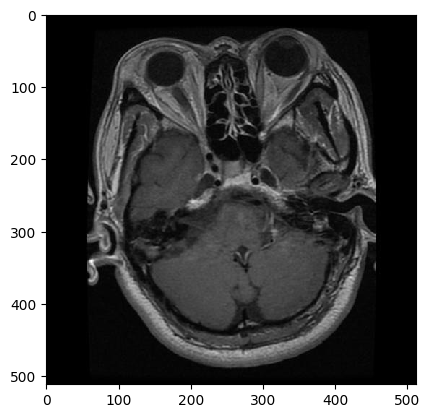

In [75]:
from keras.preprocessing import image
img = image.load_img('D:/Minor Project/brain tumor/Training/pituitary_tumor/p (3).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


In [76]:
res = model.predict(img_array)
indices = res.argmax()
indices

1/1 [==============================] - 0s 77ms/step


3